# Assignment 08

Erik Strand

## Deadline: 3/31/2021 by 07:00pm EST

## In this assignment, you will review Support Vector Machines.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
%matplotlib inline

# 1. Classification of a linear-separable case
Consder the dataset below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. 

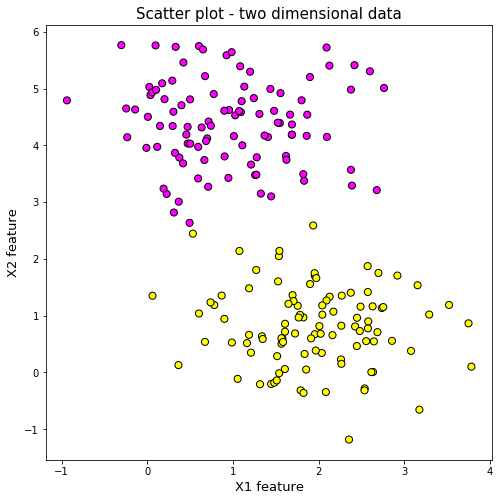

In [2]:
from sklearn.datasets import make_blobs
# create dataset (even though we will use only X, which is input features, but it comes with y variable from make_blobs)
X, Y = make_blobs(
   n_samples=200, n_features=2, # create (200,2) shape data points - in other words, 200 rows and 2 columns
   centers=2, cluster_std=0.75,
   shuffle=True, random_state=0
)

# Plot X (two dimensional data)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1],
           c=Y, marker='o', cmap='spring',
           edgecolor='black', s=50)

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)
plt.show()

### (1) Train a linear SVM use all data points (setting C=100000 just to emphasize that no slack variables are admitted)

In [3]:
clf = svm.SVC(kernel='linear', C=100000)
clf.fit(X, Y)

SVC(C=100000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### (2) Express the separating hyperplane (line) as 

In [4]:
w = clf.coef_[0]
b = clf.intercept_[0]

print ("The hyperplane is: {:.3}x + {:.3}y + {:.3} = 0".format(w[0], w[1], b))

a = -w[0] / w[1]
print("The hyperplane is: y = {:.3}*x{:.3}".format(a,- b / w[1]))

The hyperplane is: 2.05x + -10.1y + 24.6 = 0
The hyperplane is: y = 0.203*x2.44


### (3) List the support vectors and calculate the margin distance

In [5]:
print (clf.support_vectors_)

s = clf.support_vectors_[0]
print ("The downside margin is: y={:.3}*x{:.3}".format(a,(s[1] - a* s[0])))

s = clf.support_vectors_[-1]
print ("The upside margin is: y={:.3}*x+{:.3}".format(a,(s[1] - a* s[0])))

[[0.49355628 2.63623496]
 [0.53225417 2.44603331]]
The downside margin is: y=0.203*x2.54
The upside margin is: y=0.203*x+2.34


### (4) Create a plot with the hyperplane and the highlighted support vectors

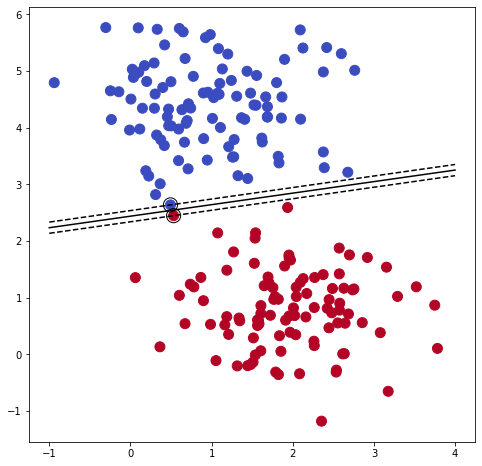

In [6]:
X=np.array(X)

xx = np.linspace(-1, 4)
yy = a * xx - b / w[1]
s = clf.support_vectors_[0]
yy_down = a * xx + (s[1] - a * s[0])
s = clf.support_vectors_[-1]
yy_up = a * xx + (s[1] - a * s[0])


plt.figure(figsize=(8,8))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.get_cmap('coolwarm', 2),s=100)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='k')
plt.axis('tight')
plt.show()

# 2. Non-linear separable case
Consder the dataset below, with two-dimensional observations X classified into 2 categories using vector Y.

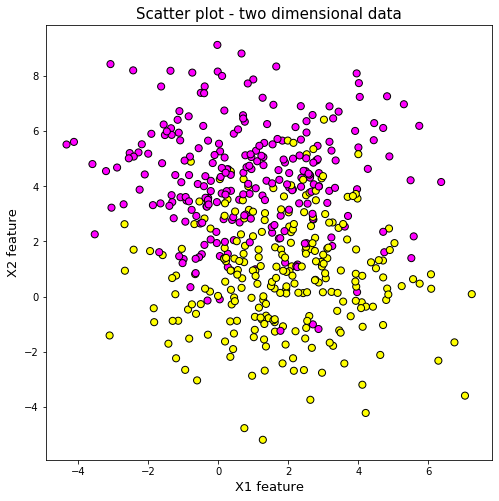

In [7]:
from sklearn.datasets import make_blobs
# create dataset (even though we will use only X, which is input features, but it comes with y variable from make_blobs)
X, Y = make_blobs(
   n_samples=500, n_features=2, # create (200,2) shape data points - in other words, 200 rows and 2 columns
   centers=2, cluster_std=2,
   shuffle=True, random_state=0
)

# Plot X (two dimensional data)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1],
           c=Y, marker='o', cmap='spring',
           edgecolor='black', s=50)

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)
plt.show()

### (1) Build linear SVMs using the following different C values and report model accuracy
C = [0.01, 0.1, 1, 10, 100, 1000]

In [8]:
for i in [0.01, 0.1, 1, 10, 100, 1000]: 
    clf = svm.SVC(kernel='linear', C=i)
    clf.fit(X, Y)
    acc = clf.score(X,Y)
    print(f"With a C value of {str(i)}, the model accuracy is %0.3f." % (acc))

With a C value of 0.01, the model accuracy is 0.810.
With a C value of 0.1, the model accuracy is 0.816.
With a C value of 1, the model accuracy is 0.818.
With a C value of 10, the model accuracy is 0.816.
With a C value of 100, the model accuracy is 0.816.
With a C value of 1000, the model accuracy is 0.816.


### (2) Plot the best result (using one of constants C above) with colored decision boundary
You can use the fuction below to make colored plane with decision boundary.

In [9]:
def classification_region(cmap):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.spring)
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

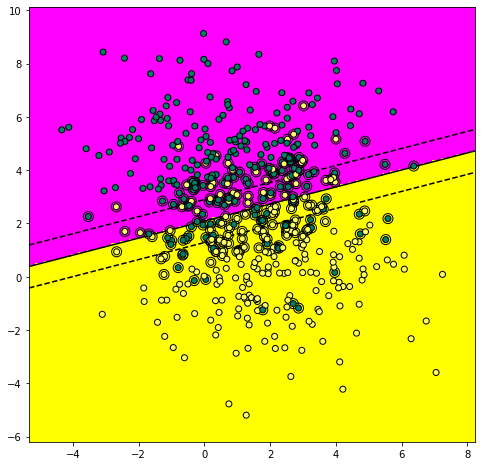

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', zorder=10) 

plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k',cmap=plt.cm.summer) 

classification_region('summer')

plt.axis('tight')
plt.show()

### (3) Build rbf SVMs using the following different gamma values and report model accuracy
gamma = [0.01, 0.1, 1, 10, 100, 1000]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=990) 

for i in [0.01, 0.1, 1, 10, 100, 1000]: 
    clf = svm.SVC(kernel='rbf', gamma=i) 
    clf.fit(X, Y)
    acc = clf.score(X,Y)
    clf.fit(X_train, Y_train)
    acc_train = clf.score(X_train, Y_train)
    acc_test = clf.score(X_test, Y_test)
    print(f"With gamma of {str(i)}, the model accuracy is %0.3f." % (acc))
    print("The training accuracy is %0.3f and the test acuracy is %0.3f" % (acc_train, acc_test))

With gamma of 0.01, the model accuracy is 0.812.
The training accuracy is 0.818 and the test acuracy is 0.788
With gamma of 0.1, the model accuracy is 0.816.
The training accuracy is 0.833 and the test acuracy is 0.806
With gamma of 1, the model accuracy is 0.840.
The training accuracy is 0.851 and the test acuracy is 0.776
With gamma of 10, the model accuracy is 0.914.
The training accuracy is 0.937 and the test acuracy is 0.733
With gamma of 100, the model accuracy is 0.988.
The training accuracy is 0.994 and the test acuracy is 0.600
With gamma of 1000, the model accuracy is 0.998.
The training accuracy is 1.000 and the test acuracy is 0.521


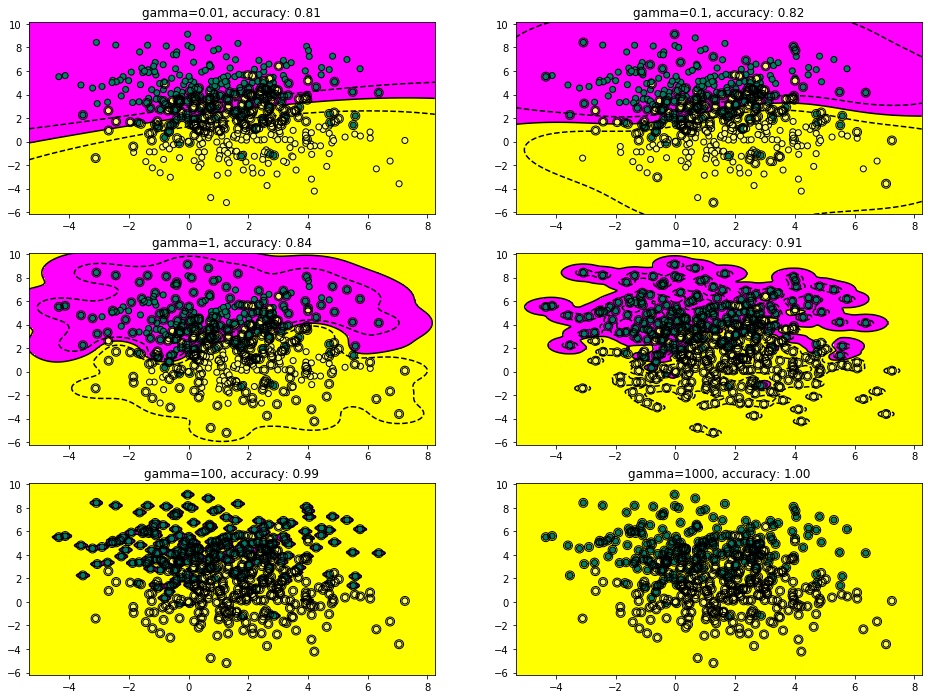

In [12]:
fig = plt.figure(figsize=(16,12))

# gamma = 0.01 
plt.subplot(3,2,1)
clf = svm.SVC(kernel='rbf', gamma=0.01) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=0.01, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

# gamma = 0.1 
plt.subplot(3,2,2)
clf = svm.SVC(kernel='rbf', gamma=0.1) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=0.1, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

# gamma = 1
plt.subplot(3,2,3)
clf = svm.SVC(kernel='rbf', gamma=1) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=1, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

# gamma = 10 
plt.subplot(3,2,4)
clf = svm.SVC(kernel='rbf', gamma=10) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=10, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

# gamma = 100 
plt.subplot(3,2,5)
clf = svm.SVC(kernel='rbf', gamma=100) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=100, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

# gamma = 1000
plt.subplot(3,2,6)
clf = svm.SVC(kernel='rbf', gamma=1000) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=1000, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

plt.show()

### (4) Plot the best result (using one of gamma parameters above) with colored decision boundary

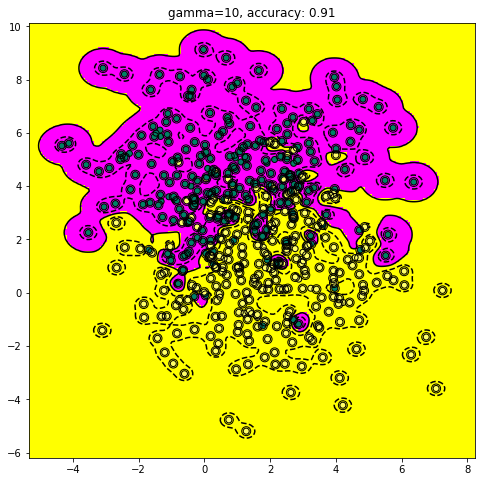

In [13]:
plt.figure(figsize=(8,8))
clf = svm.SVC(kernel='rbf', gamma=10) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
classification_region('summer')
plt.title('gamma=10, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

plt.show()

Although a gamma of 100 or 1000 is more accurate for this specific dataset, those models overfit the data and are not good for predicting any test set. A gamma of 10 maintains a high overall accuracy while also preserving the ability to predict test data accurately. 

### (5) Explain what you found (e.g. difference between linear vs. rbf, model performance change etc.)

# 3. Classification of taxi trips
Use a dataset 'NYC_taxi_sample.csv' to build SVMs to classify taxi trips either in Manhatten (1) or other bouroughs (0) based on tip, distance, speed, and the numberof passanger. 
* All features are coded as discrete/categorical variables, so you don't need to transform data.
* 'manhattan' column is target variable
* Other features are predictors.

### Try to build various SVMs and explain about your final model.

* Try various kernel types
* You might need a parameter tuning process. 
* This task is an open ended question! (fyi, due to the size of the data, the model performance would be moderate)

In [14]:
taxi = pd.read_csv("../data/NYC_taxi_sample.csv")

taxi.head()

,manhattan,tip,dist,speed,pass
0,1,1,1,1,1
1,1,3,5,6,1
2,1,1,6,4,2
3,2,2,2,2,1
4,1,4,1,1,1


In [15]:
X, Y = taxi.iloc[:,1:], taxi.iloc[:,0]

In [16]:
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)
print (clf.score(X,Y))

0.6935635203602928


In [17]:
for i in [0.01, 0.1, 1, 10]: 
    clf = svm.SVC(kernel='linear', C=i)
    clf.fit(X, Y)
    acc = clf.score(X,Y)
    print(f"With a C value of {str(i)}, the model accuracy is %0.3f." % (acc))

With a C value of 0.01, the model accuracy is 0.694.
With a C value of 0.1, the model accuracy is 0.694.
With a C value of 1, the model accuracy is 0.694.
With a C value of 10, the model accuracy is 0.694.


The model is insensitive to variation in C - a linear SVM can predict borough with a maximum accuracy of 0.694. 

In [18]:
clf = svm.SVC(kernel='rbf')
clf.fit(X, Y)
print (clf.score(X,Y))

0.7423531619440795


In [19]:
for i in [0.01, 0.1, 1, 10, 100]: 
    clf = svm.SVC(kernel='rbf', gamma=i) 
    clf.fit(X, Y)
    acc = clf.score(X,Y)
    print(f"With gamma of {str(i)}, the model accuracy is %0.4f." % (acc))

With gamma of 0.01, the model accuracy is 0.7138.
With gamma of 0.1, the model accuracy is 0.7425.
With gamma of 1, the model accuracy is 0.7637.
With gamma of 10, the model accuracy is 0.7675.
With gamma of 100, the model accuracy is 0.7675.


A gamma of 10 or higher is optimal for predicting borough using an RBF SVM. 